In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
digits=load_digits()
print("Shape of Image",digits.images.shape)
print("Target labels",np.unique(digits.target))

Shape of Image (1797, 8, 8)
Target labels [0 1 2 3 4 5 6 7 8 9]


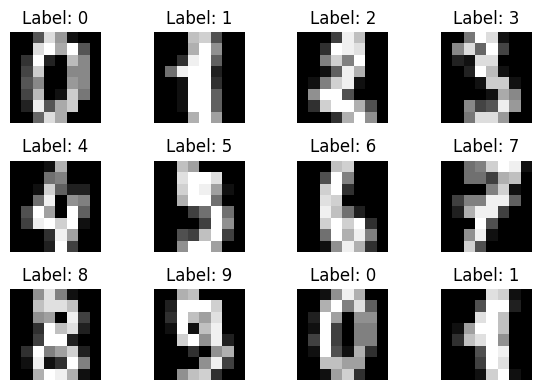

In [ ]:
plt.figure(figsize=(6, 4))

for i in range(12):
    plt.subplot(3, 4, i + 1)  # Corrected indentation and using i+1 for subplot index
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")  # Corrected f-string formatting
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
x = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
kn = KNeighborsClassifier(n_neighbors=3) # You can try different K values
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = kn.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  1  0]
 [ 0  0  2 30  0  1  0  0  0  0]
 [ 0  0  0  0 33  0  0  1  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  3  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  2  0  0  0  1 30]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      1.00      0.96        40
           2       0.95      0.97      0.96        37
           3       1.00      0.91      0.95        33
           4       0.94      0.97      0.96        34
           5       0.98      1.00      0.99        42
           6       1.00      1.00      1.00        34
           7       0.98      0.98      0.98        41
           8       0.93      0.90      0.92        30
           9       0.97      0.91      0.94        33

    accuracy                 

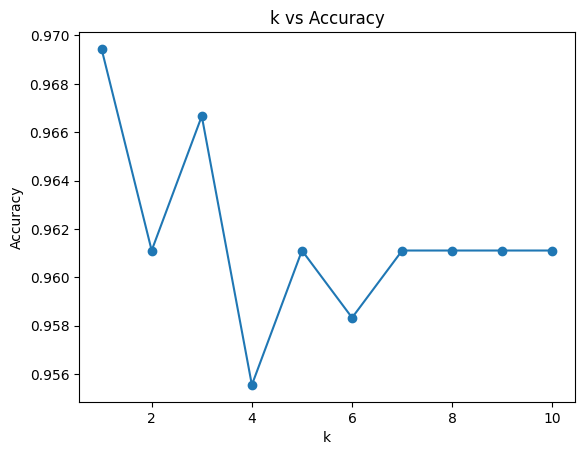

Best k value: 1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_values = list(range(1, 11))  # Values of k to try
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.show()

# Find the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k}")